state and cause
discovery date, day of yr, time

statues code for type of fire

cont_date


[time length, code of fire]


make an analysis
u will get a plots

tran and test and pedict

which state gets the code of fire using the duration and area burnt




In [1]:
import pandas as pd

In [2]:
from sqlite3 import connect

In [3]:
conn = connect(r"C:\Users\DELL\Desktop\UMBC Academic\Cap\Data\archive\FPA_FOD_20170508.sqlite")

In [4]:
conn

In [5]:
data = pd.read_sql(sql = """SELECT name FROM sqlite_master  
  WHERE type='table';""",con = conn )

In [6]:
data

,name
0,spatial_ref_sys
1,spatialite_history
2,sqlite_sequence
3,geometry_columns
4,spatial_ref_sys_aux
5,views_geometry_columns
6,virts_geometry_columns
7,geometry_columns_statistics
8,views_geometry_columns_statistics
9,virts_geometry_columns_statistics


In [7]:
for table in data['name']:
    try:
        in_data = pd.read_sql(sql = 'select * from '+table, con = conn)
        if table != 'SpatialIndex':
            print(table,in_data.shape)
    except:
        pass

spatial_ref_sys (4924, 6)
spatialite_history (16, 7)
sqlite_sequence (3, 2)
geometry_columns (1, 6)
spatial_ref_sys_aux (4873, 12)
views_geometry_columns (0, 6)
virts_geometry_columns (0, 5)
geometry_columns_statistics (1, 8)
views_geometry_columns_statistics (0, 8)
virts_geometry_columns_statistics (0, 8)
geometry_columns_field_infos (0, 14)
views_geometry_columns_field_infos (0, 14)
virts_geometry_columns_field_infos (0, 14)
geometry_columns_time (1, 5)
geometry_columns_auth (1, 4)
views_geometry_columns_auth (0, 3)
virts_geometry_columns_auth (0, 3)
sql_statements_log (0, 7)
Fires (1880465, 39)
idx_Fires_Shape (1880465, 5)
idx_Fires_Shape_node (72263, 2)
idx_Fires_Shape_rowid (1880465, 2)
idx_Fires_Shape_parent (72262, 2)
NWCG_UnitIDActive_20170109 (5867, 13)


In [37]:
fires_data = pd.read_sql(sql = 'select * from Fires', con = conn)

State code with state level FIPS CODE

In [38]:
state_codes = {
    'AL': '01',
    'AK': '02',
    'AZ': '04',
    'AR': '05',
    'CA': '06',
    'CO': '08',
    'CT': '09',
    'DE': '10',
    'DC': '11',
    'FL': '12',
    'GA': '13',
    'HI': '15',
    'ID': '16',
    'IL': '17',
    'IN': '18',
    'IA': '19',
    'KS': '20',
    'KY': '21',
    'LA': '22',
    'ME': '23',
    'MD': '24',
    'MA': '25',
    'MI': '26',
    'MN': '27',
    'MS': '28',
    'MO': '29',
    'MT': '30',
    'NE': '31',
    'NV': '32',
    'NH': '33',
    'NJ': '34',
    'NM': '35',
    'NY': '36',
    'NC': '37',
    'ND': '38',
    'OH': '39',
    'OK': '40',
    'OR': '41',
    'PA': '42',
    'RI': '44',
    'SC': '45',
    'SD': '46',
    'TN': '47',
    'TX': '48',
    'UT': '49',
    'VT': '50',
    'VA': '51',
    'WA': '53',
    'WV': '54',
    'WI': '55',
    'WY': '56'
}


In [39]:
fires_data['FIPS_CODE'][500:]

500         005
501         019
502         019
503         033
504         019
           ... 
1880460    None
1880461    None
1880462    None
1880463    None
1880464    None
Name: FIPS_CODE, Length: 1879965, dtype: object

In [40]:
fires_data['STATE'][500:]

500        OR
501        WY
502        WY
503        WY
504        WY
           ..
1880460    CA
1880461    CA
1880462    CA
1880463    CA
1880464    CA
Name: STATE, Length: 1879965, dtype: object

In [41]:
#checkpoint data for initial data, remove '#' to get the original data
#copy_data = fires_data

In [42]:
fires_data.head().T

,0,1,2,3,4
OBJECTID,1,2,3,4,5
FOD_ID,1,2,3,4,5
FPA_ID,FS-1418826,FS-1418827,FS-1418835,FS-1418845,FS-1418847
SOURCE_SYSTEM_TYPE,FED,FED,FED,FED,FED
SOURCE_SYSTEM,FS-FIRESTAT,FS-FIRESTAT,FS-FIRESTAT,FS-FIRESTAT,FS-FIRESTAT
NWCG_REPORTING_AGENCY,FS,FS,FS,FS,FS
NWCG_REPORTING_UNIT_ID,USCAPNF,USCAENF,USCAENF,USCAENF,USCAENF
NWCG_REPORTING_UNIT_NAME,Plumas National Forest,Eldorado National Forest,Eldorado National Forest,Eldorado National Forest,Eldorado National Forest
SOURCE_REPORTING_UNIT,0511,0503,0503,0503,0503
SOURCE_REPORTING_UNIT_NAME,Plumas National Forest,Eldorado National Forest,Eldorado National Forest,Eldorado National Forest,Eldorado National Forest


WORKING ON FIPS CODE TO EXTRACT COUNTY NAMES

In [43]:
fires_data['STATE_FIPS_CODE'] = fires_data['STATE'].map(state_codes)

In [44]:
fires_data['COUNTY_FIPS_CODE'] = fires_data['STATE_FIPS_CODE']+fires_data['FIPS_CODE']

In [45]:
fires_data['STATE_FIPS_CODE']

0          06
1          06
2          06
3          06
4          06
           ..
1880460    06
1880461    06
1880462    06
1880463    06
1880464    06
Name: STATE_FIPS_CODE, Length: 1880465, dtype: object

In [46]:
fires_data['COUNTY_FIPS_CODE']

0          06063
1          06061
2          06017
3          06003
4          06003
           ...  
1880460      NaN
1880461      NaN
1880462      NaN
1880463      NaN
1880464      NaN
Name: COUNTY_FIPS_CODE, Length: 1880465, dtype: object

In [47]:
import requests
from bs4 import BeautifulSoup

# URL of the Wikipedia page containing FIPS codes by county
url = 'https://en.wikipedia.org/wiki/List_of_United_States_FIPS_codes_by_county'

response = requests.get(url)

soup = BeautifulSoup(response.text, 'html.parser')

fips_table = soup.find('table', {'class': 'wikitable sortable'})

fips_dict = {}
for row in fips_table.find_all('tr')[1:]:
    cells = row.find_all('td')
    if len(cells) > 1:
        fips_code = cells[0].text.strip()
        county_name = cells[1].text.strip()
        fips_dict[fips_code] = county_name

In [48]:
fires_data['COUNTY_NAME'] = fires_data['COUNTY_FIPS_CODE'].map(fips_dict)

WORKING ON EXTRACTION OF ELEMENTS ON DISCOVERY DATE

In [20]:
#fires_data['DISCOVERY_DATE'] = pd.to_datetime(fires_data['DISCOVERY_DATE'])

In [21]:
#fires_data['MONTH'] = fires_data['DISCOVERY_DATE'].dt.month

In [22]:
#fires_data['WEEKDAY'] = fires_data['DISCOVERY_DATE'].dt.weekday

In [49]:
null_data = fires_data.isna().sum()

In [50]:
top_county_fips = fires_data['COUNTY_FIPS_CODE'].value_counts().nlargest(5).index

top_counties_data = fires_data[fires_data['COUNTY_FIPS_CODE'].isin(top_county_fips)]
top_counties_data

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape,STATE_FIPS_CODE,COUNTY_FIPS_CODE,COUNTY_NAME
75,76,77,FS-1419053,FED,FS-FIRESTAT,FS,USAZKNF,Kaibab National Forest,0307,Kaibab National Forest,...,5.0,USFS,AZ,5,005,Coconino,b'\x00\x01\xad\x10\x00\x00 q\xc9P\xd9\r\\\xc0\...,04,04005,Coconino County
209,210,213,FS-1419352,FED,FS-FIRESTAT,FS,USAZASF,Apache-Sitgreaves National Forest,0301,Apache-Sitgreaves National Forest,...,5.0,USFS,AZ,5,005,Coconino,b'\x00\x01\xad\x10\x00\x00\xf4(\\\x8f\xc2\xb9[...,04,04005,Coconino County
215,216,219,FS-1419360,FED,FS-FIRESTAT,FS,USAZASF,Apache-Sitgreaves National Forest,0301,Apache-Sitgreaves National Forest,...,5.0,USFS,AZ,5,005,Coconino,b'\x00\x01\xad\x10\x00\x00\xc8\xcd\xe4Y\xd1\xc...,04,04005,Coconino County
247,248,252,FS-1419430,FED,FS-FIRESTAT,FS,USAZASF,Apache-Sitgreaves National Forest,0301,Apache-Sitgreaves National Forest,...,5.0,USFS,AZ,5,005,Coconino,b'\x00\x01\xad\x10\x00\x00\x0c\xb0w\xfb\x83\xb...,04,04005,Coconino County
256,257,261,FS-1419443,FED,FS-FIRESTAT,FS,USAZASF,Apache-Sitgreaves National Forest,0301,Apache-Sitgreaves National Forest,...,5.0,USFS,AZ,5,005,Coconino,b'\x00\x01\xad\x10\x00\x00@\xf6\xb4\xa2\x91\xc...,04,04005,Coconino County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872276,1872277,300308646,SFO-2015CACDFRRU115600,NONFED,ST-NASF,ST/C&L,USCARRU,Riverside Unit,CARRU,CDF - Riverside Unit,...,14.0,MISSING/NOT SPECIFIED,CA,RIVERSIDE,065,Riverside,b'\x00\x01\xad\x10\x00\x00\x98\xa5d9\tU]\xc0h\...,06,06065,Riverside County
1872291,1872292,300308663,SFO-2015CACDFRRU131152,NONFED,ST-NASF,ST/C&L,USCARRU,Riverside Unit,CARRU,CDF - Riverside Unit,...,14.0,MISSING/NOT SPECIFIED,CA,RIVERSIDE,065,Riverside,b'\x00\x01\xad\x10\x00\x00d\xce\xfa\x94cO]\xc0...,06,06065,Riverside County
1872296,1872297,300308669,SFO-2015CACDFRRU112798,NONFED,ST-NASF,ST/C&L,USCARRU,Riverside Unit,CARRU,CDF - Riverside Unit,...,14.0,MISSING/NOT SPECIFIED,CA,RIVERSIDE,065,Riverside,b'\x00\x01\xad\x10\x00\x00\x08\xf7\xca\xbcUP]\...,06,06065,Riverside County
1872298,1872299,300308671,SFO-2015CACDFRRU140361,NONFED,ST-NASF,ST/C&L,USCARRU,Riverside Unit,CARRU,CDF - Riverside Unit,...,14.0,MISSING/NOT SPECIFIED,CA,RIVERSIDE,065,Riverside,b'\x00\x01\xad\x10\x00\x00\x08\xed\x9cf\x81\x0...,06,06065,Riverside County


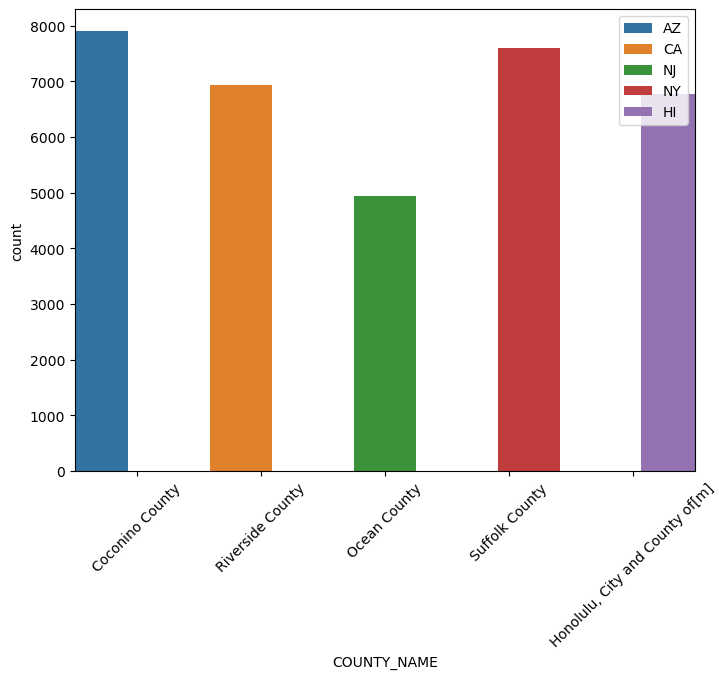

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'category' is the column you want to plot
plt.figure(figsize=(8,6))
sns.countplot(data=top_counties_data, x='COUNTY_NAME',hue='STATE')

# Increase the width of the bars
for patch in plt.gca().patches:
    current_width = patch.get_width()
    diff = current_width - 0.5  # desired width - current width
    # we change the bar width
    patch.set_width(0.5)
    # we recenter the bar
    patch.set_x(patch.get_x() + diff * .5)

# Place the legend to the top left
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()


In [52]:
fires_data[['COUNTY','FIPS_CODE']][:30]

,COUNTY,FIPS_CODE
0,63,063
1,61,061
2,17,017
3,3,003
4,3,003
5,5,005
6,17,017
7,None,None
8,None,None
9,5,005


FIPS code and county numbers are the same and are redundant column

In [53]:
#removing null values
columns = []
for i in null_data.index:
    if null_data[i]/fires_data.shape[0]>=0.95:
        columns.append(i)

In [54]:
#columns that has more than 95%null values
columns

['ICS_209_INCIDENT_NUMBER',
 'ICS_209_NAME',
 'MTBS_ID',
 'MTBS_FIRE_NAME',
 'COMPLEX_NAME']

Removing columns that are irrelevant for the model prediction and EDA

In [55]:
fires_data['FIPS_NAME'].isna().sum()

678148

In [56]:
#removing columns that are IDs and irrelevant to the fire prediction
columns.extend("""FOD_ID, FPA_ID, SOURCE_SYSTEM, NWCG_REPORTING_UNIT_ID, NWCG_REPORTING_UNIT_NAME, SOURCE_REPORTING_UNIT_NAME, LOCAL_FIRE_REPORT_ID, LOCAL_INCIDENT_ID, FIPS_NAME, Shape""".split(', '))

In [57]:
columns

['ICS_209_INCIDENT_NUMBER',
 'ICS_209_NAME',
 'MTBS_ID',
 'MTBS_FIRE_NAME',
 'COMPLEX_NAME',
 'FOD_ID',
 'FPA_ID',
 'SOURCE_SYSTEM',
 'NWCG_REPORTING_UNIT_ID',
 'NWCG_REPORTING_UNIT_NAME',
 'SOURCE_REPORTING_UNIT_NAME',
 'LOCAL_FIRE_REPORT_ID',
 'LOCAL_INCIDENT_ID',
 'FIPS_NAME',
 'Shape']

In [58]:
fires_data.drop(columns = columns,axis=1,inplace=True)

In [59]:
fires_data.drop(['OBJECTID', 'FIRE_CODE'], axis=1, inplace=True)

Converting the DISCOVERY_DATE AND CONT_DATE, which are in julian date to standard date

In [60]:
#conversion of julian date to calender date
from datetime import datetime
def julian_to_standard(julian_date):
    if pd.isna(julian_date):
        return pd.NA
    else:
        return datetime.fromordinal(int(julian_date) - 1721425).date()
fires_data['DISCOVERY_DATE'] = fires_data['DISCOVERY_DATE'].apply(julian_to_standard)
fires_data['CONT_DATE'] = fires_data['CONT_DATE'].apply(julian_to_standard)

In [61]:
fires_data['DURATION_DATE'] = fires_data['CONT_DATE'] - fires_data['DISCOVERY_DATE']

In [62]:
fires_data['DURATION_DATE']  =fires_data['DURATION_DATE'].dt.days

In [63]:
fires_data['DISCOVERY_DATE']

0          2005-02-01
1          2004-05-11
2          2004-05-30
3          2004-06-27
4          2004-06-27
              ...    
1880460    2015-09-25
1880461    2015-10-04
1880462    2015-05-01
1880463    2015-10-13
1880464    2015-03-13
Name: DISCOVERY_DATE, Length: 1880465, dtype: object

In [64]:
'''
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(fires_data[['DURATION_DATE','FIRE_SIZE']].dropna())
data_scaled_df = pd.DataFrame(data_scaled, columns=['DURATION_DATE', 'FIRE_SIZE'])
data_scaled_df.corr()'''

"\nfrom sklearn.preprocessing import StandardScaler\n\nscaler = StandardScaler()\ndata_scaled = scaler.fit_transform(fires_data[['DURATION_DATE','FIRE_SIZE']].dropna())\ndata_scaled_df = pd.DataFrame(data_scaled, columns=['DURATION_DATE', 'FIRE_SIZE'])\ndata_scaled_df.corr()"

<Axes: xlabel='FIRE_SIZE', ylabel='DURATION_DATE'>

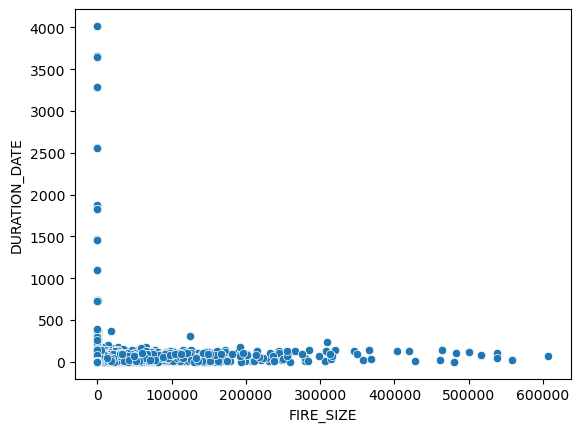

In [65]:
import seaborn as sns
sns.scatterplot(x='FIRE_SIZE',y='DURATION_DATE',data=fires_data)

In [66]:
#change
#-->look at fires of greater size

There is a little to no correlation between fire_size and the number of days to put off the fire

In [ ]:
fires_data_g = fires_data[fires_data['FIRE_SIZE']>0.5]

In [ ]:
fires_data_g.shape

In [ ]:
fires_data_g.isna().sum()

In [ ]:
import seaborn as sns
sns.countplot(fires_data_g['FIRE_NAME'])

In [ ]:
fires_data_g

Filling NA values in the computed DURATION_DATE by grouping FIRE_SIZE_CLASS and STATE columns

In [ ]:
fires_data_g.columns

In [67]:
#filling duration_doy
fires_data['DURATION_DATE'] = fires_data.groupby(['FIRE_SIZE_CLASS', 'STATE'])['DURATION_DATE'].transform(lambda x: x.fillna(x.mean()))
fires_data['DURATION_DATE'].fillna(fires_data['DURATION_DATE'].mean(), inplace=True)

In [69]:
fires_data.isna().sum()

SOURCE_SYSTEM_TYPE            0
NWCG_REPORTING_AGENCY         0
SOURCE_REPORTING_UNIT         0
FIRE_NAME                957189
FIRE_YEAR                     0
DISCOVERY_DATE                0
DISCOVERY_DOY                 0
DISCOVERY_TIME           882638
STAT_CAUSE_CODE               0
STAT_CAUSE_DESCR              0
CONT_DATE                891531
CONT_DOY                 891531
CONT_TIME                972173
FIRE_SIZE                     0
FIRE_SIZE_CLASS               0
LATITUDE                      0
LONGITUDE                     0
OWNER_CODE                    0
OWNER_DESCR                   0
STATE                         0
COUNTY                   678148
FIPS_CODE                678148
STATE_FIPS_CODE           22081
COUNTY_FIPS_CODE         678224
COUNTY_NAME              679062
DURATION_DATE                 0
dtype: int64

Filling NA values of CONT_DATE

In [70]:
#filling null values of cont_date
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')
fires_data['CONT_DATE'] = fires_data['DISCOVERY_DATE']+fires_data['DURATION_DATE'].transform(lambda x:timedelta(days=x))

In [71]:
fires_data['CONT_DOY'] = fires_data['DISCOVERY_DOY']+fires_data['DURATION_DATE']

Filling the unknown COUNTY names by grouping Fire DISCOVERED_DATE and STATE

In [72]:
import numpy as np
fires_data['FIPS_CODE'] = fires_data.groupby(['DISCOVERY_DATE', 'STATE'])['FIPS_CODE'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

In [73]:
#filling na values of firename based on the grouping of FIRE_SIZE_CLASS
def get_mode(series):
    if len(series.mode()) > 0:
        return series.mode()[0]
    else:
        return "UNKNOWN"
fires_data['FIRE_NAME'] = fires_data.groupby('FIRE_SIZE_CLASS')['FIRE_NAME'].transform(lambda x: x.fillna(get_mode(x)))

In [75]:
fires_data['COUNTY_NAME'] = (fires_data['STATE_FIPS_CODE']+fires_data['FIPS_CODE']).map(fips_dict)

In [76]:
fires_data.drop(['DISCOVERY_TIME','CONT_TIME'],axis=1, inplace=True)

In [77]:
fires_data.drop(['STATE_FIPS_CODE','COUNTY_FIPS_CODE'],axis=1, inplace=True)

In [ ]:
#copy_data = fires_data_g

In [79]:
fires_data.dropna(subset=['COUNTY','FIPS_CODE','COUNTY_NAME'],inplace=True)

In [80]:
fires_data.isna().sum()

SOURCE_SYSTEM_TYPE       0
NWCG_REPORTING_AGENCY    0
SOURCE_REPORTING_UNIT    0
FIRE_NAME                0
FIRE_YEAR                0
DISCOVERY_DATE           0
DISCOVERY_DOY            0
STAT_CAUSE_CODE          0
STAT_CAUSE_DESCR         0
CONT_DATE                0
CONT_DOY                 0
FIRE_SIZE                0
FIRE_SIZE_CLASS          0
LATITUDE                 0
LONGITUDE                0
OWNER_CODE               0
OWNER_DESCR              0
STATE                    0
COUNTY                   0
FIPS_CODE                0
COUNTY_NAME              0
DURATION_DATE            0
dtype: int64

Replacing Missing/Undefined attribute in STAT_CAUSE_DESCR to possible cause using grouping.

In [81]:
fires_data['STAT_CAUSE_DESCR'] = fires_data['STAT_CAUSE_DESCR'].transform(lambda x: pd.NA if x=='Missing/Undefined' else x)
fires_data['STAT_CAUSE_DESCR'] = fires_data.groupby(['STATE','COUNTY','FIRE_YEAR'])['STAT_CAUSE_DESCR'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))

In [82]:
fires_data.dropna(subset=['STAT_CAUSE_DESCR'], inplace=True)

In [ ]:
fires_data['MONTH'] = pd.to_datetime(fires_data['DISCOVERY_DATE']).dt.month

fires_data['WEEKDAY'] = pd.to_datetime(fires_data['DISCOVERY_DATE']).dt.weekday

In [89]:
fires_data.columns

Index(['SOURCE_SYSTEM_TYPE', 'NWCG_REPORTING_AGENCY', 'SOURCE_REPORTING_UNIT',
       'FIRE_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE', 'CONT_DOY',
       'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_CODE',
       'OWNER_DESCR', 'STATE', 'COUNTY', 'FIPS_CODE', 'COUNTY_NAME',
       'DURATION_DATE', 'MONTH', 'WEEKDAY'],
      dtype='object')

In [90]:
correlation_matrix = fires_data.corr()
top_correlated_values = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates().head(10)
top_correlated_values

FIRE_YEAR      FIRE_YEAR          1.000000
DISCOVERY_DOY  CONT_DOY           0.992465
               MONTH              0.977979
CONT_DOY       MONTH              0.970660
LONGITUDE      OWNER_CODE         0.446685
OWNER_CODE     STAT_CAUSE_CODE    0.295281
LONGITUDE      STAT_CAUSE_CODE    0.179776
LATITUDE       CONT_DOY           0.138317
CONT_DOY       DURATION_DATE      0.134272
DISCOVERY_DOY  LATITUDE           0.130707
dtype: float64

In [91]:
top_states = fires_data['STATE'].value_counts().head(5).index
top_states_data = fires_data[fires_data['STATE'].isin(top_states)] #STAT_CAUSE_DESCR,FIRE_SIZE_CLASS, OWNER_DESCR
top_states_data

,SOURCE_SYSTEM_TYPE,NWCG_REPORTING_AGENCY,SOURCE_REPORTING_UNIT,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,...,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,COUNTY_NAME,DURATION_DATE,MONTH,WEEKDAY
0,FED,FS,0511,FOUNTAIN,2005,2005-02-01,33,9.0,Miscellaneous,2005-02-01,...,-121.005833,5.0,USFS,CA,63,063,Plumas County,0.000000,2,1
1,FED,FS,0503,PIGEON,2004,2004-05-11,133,1.0,Lightning,2004-05-11,...,-120.404444,5.0,USFS,CA,61,061,Placer County,0.000000,5,1
2,FED,FS,0503,SLACK,2004,2004-05-30,152,5.0,Debris Burning,2004-05-30,...,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado County,0.000000,5,6
3,FED,FS,0503,DEER,2004,2004-06-27,180,1.0,Lightning,2004-07-02,...,-119.913333,5.0,USFS,CA,3,003,Alpine County,5.000000,6,6
4,FED,FS,0503,STEVENOT,2004,2004-06-27,180,1.0,Lightning,2004-07-02,...,-119.933056,5.0,USFS,CA,3,003,Alpine County,5.000000,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872300,NONFED,ST/C&L,CAAEU,UNKNOWN,2015,2015-10-04,278,13.0,Miscellaneous,2015-10-04,...,-121.372908,14.0,MISSING/NOT SPECIFIED,CA,SACRAMENTO,067,Sacramento County,0.550568,10,6
1872301,NONFED,ST/C&L,CATCU,HOGAN,2015,2015-10-20,294,9.0,Miscellaneous,2015-10-20,...,-120.801955,15.0,UNDEFINED FEDERAL,CA,CALAVERAS,009,Calaveras County,0.000000,10,1
1872302,NONFED,ST/C&L,CARRU,FASHION WY BAN,2015,2015-11-26,331,9.0,Miscellaneous,2015-11-26,...,-116.882973,14.0,MISSING/NOT SPECIFIED,CA,RIVERSIDE,065,Riverside County,0.000000,11,3
1872303,NONFED,ST/C&L,CAFKU,HEMLOCK,2015,2015-11-20,325,5.0,Debris Burning,2015-11-20,...,-119.322918,14.0,MISSING/NOT SPECIFIED,CA,FRESNO,019,Fresno County,0.550568,11,4


In [92]:
fires_data.to_csv('fires_data.csv', index=False)

In [93]:
import pandas as pd
fires_data = pd.read_csv('fires_data.csv')

In [94]:
fires_data.head()

,SOURCE_SYSTEM_TYPE,NWCG_REPORTING_AGENCY,SOURCE_REPORTING_UNIT,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,...,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,COUNTY_NAME,DURATION_DATE,MONTH,WEEKDAY
0,FED,FS,0511,FOUNTAIN,2005,2005-02-01,33,9.0,Miscellaneous,2005-02-01,...,-121.005833,5.0,USFS,CA,63,63,Plumas County,0.0,2,1
1,FED,FS,0503,PIGEON,2004,2004-05-11,133,1.0,Lightning,2004-05-11,...,-120.404444,5.0,USFS,CA,61,61,Placer County,0.0,5,1
2,FED,FS,0503,SLACK,2004,2004-05-30,152,5.0,Debris Burning,2004-05-30,...,-120.735556,13.0,STATE OR PRIVATE,CA,17,17,El Dorado County,0.0,5,6
3,FED,FS,0503,DEER,2004,2004-06-27,180,1.0,Lightning,2004-07-02,...,-119.913333,5.0,USFS,CA,3,3,Alpine County,5.0,6,6
4,FED,FS,0503,STEVENOT,2004,2004-06-27,180,1.0,Lightning,2004-07-02,...,-119.933056,5.0,USFS,CA,3,3,Alpine County,5.0,6,6


In [95]:
fires_data.shape

(1100986, 24)

In [96]:
fires_data.columns

Index(['SOURCE_SYSTEM_TYPE', 'NWCG_REPORTING_AGENCY', 'SOURCE_REPORTING_UNIT',
       'FIRE_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE', 'CONT_DOY',
       'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_CODE',
       'OWNER_DESCR', 'STATE', 'COUNTY', 'FIPS_CODE', 'COUNTY_NAME',
       'DURATION_DATE', 'MONTH', 'WEEKDAY'],
      dtype='object')

# EDA

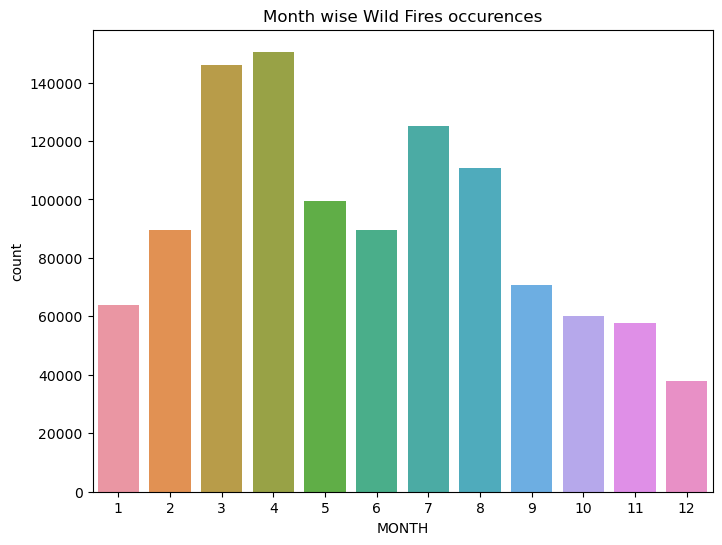

In [97]:
plt.figure(figsize=(8,6))
plt.title('Month wise Wild Fires occurences')
sns.countplot(x='MONTH',data=fires_data)
plt.show()

In [98]:
'''
#scaling the data for better visualization, excluding the nummerical columns: Latitude, Longitude, DURATION_DATE
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_columns = fires_data.select_dtypes(include=['float64', 'int64']).columns.drop(['LATITUDE', 'LONGITUDE', 'DURATION_DATE','FIRE_YEAR', 'STAT_CAUSE_CODE', 'OWNER_CODE'])
fires_data[numerical_columns] = scaler.fit_transform(fires_data[numerical_columns])
'''

"\n#scaling the data for better visualization, excluding the nummerical columns: Latitude, Longitude, DURATION_DATE\nfrom sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nnumerical_columns = fires_data.select_dtypes(include=['float64', 'int64']).columns.drop(['LATITUDE', 'LONGITUDE', 'DURATION_DATE','FIRE_YEAR', 'STAT_CAUSE_CODE', 'OWNER_CODE'])\nfires_data[numerical_columns] = scaler.fit_transform(fires_data[numerical_columns])\n"

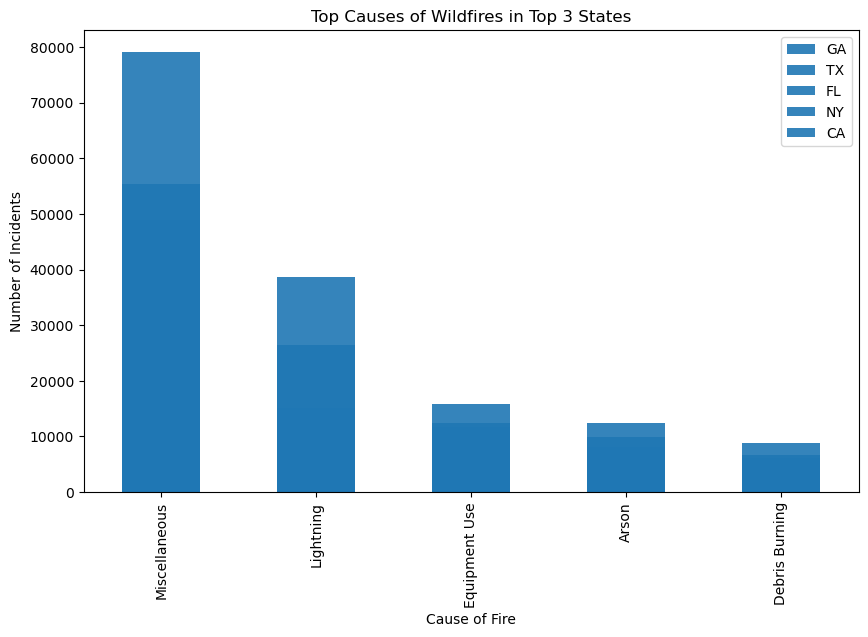

In [99]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for state in top_states:
    state_data = top_states_data[top_states_data['STATE'] == state]
    incidents_by_cause = state_data['STAT_CAUSE_DESCR'].value_counts().head(5)
    incidents_by_cause.plot(kind='bar', alpha=0.9,label=state)

plt.title('Top Causes of Wildfires in Top 3 States')
plt.xlabel('Cause of Fire')
plt.ylabel('Number of Incidents')
plt.legend()
plt.show()

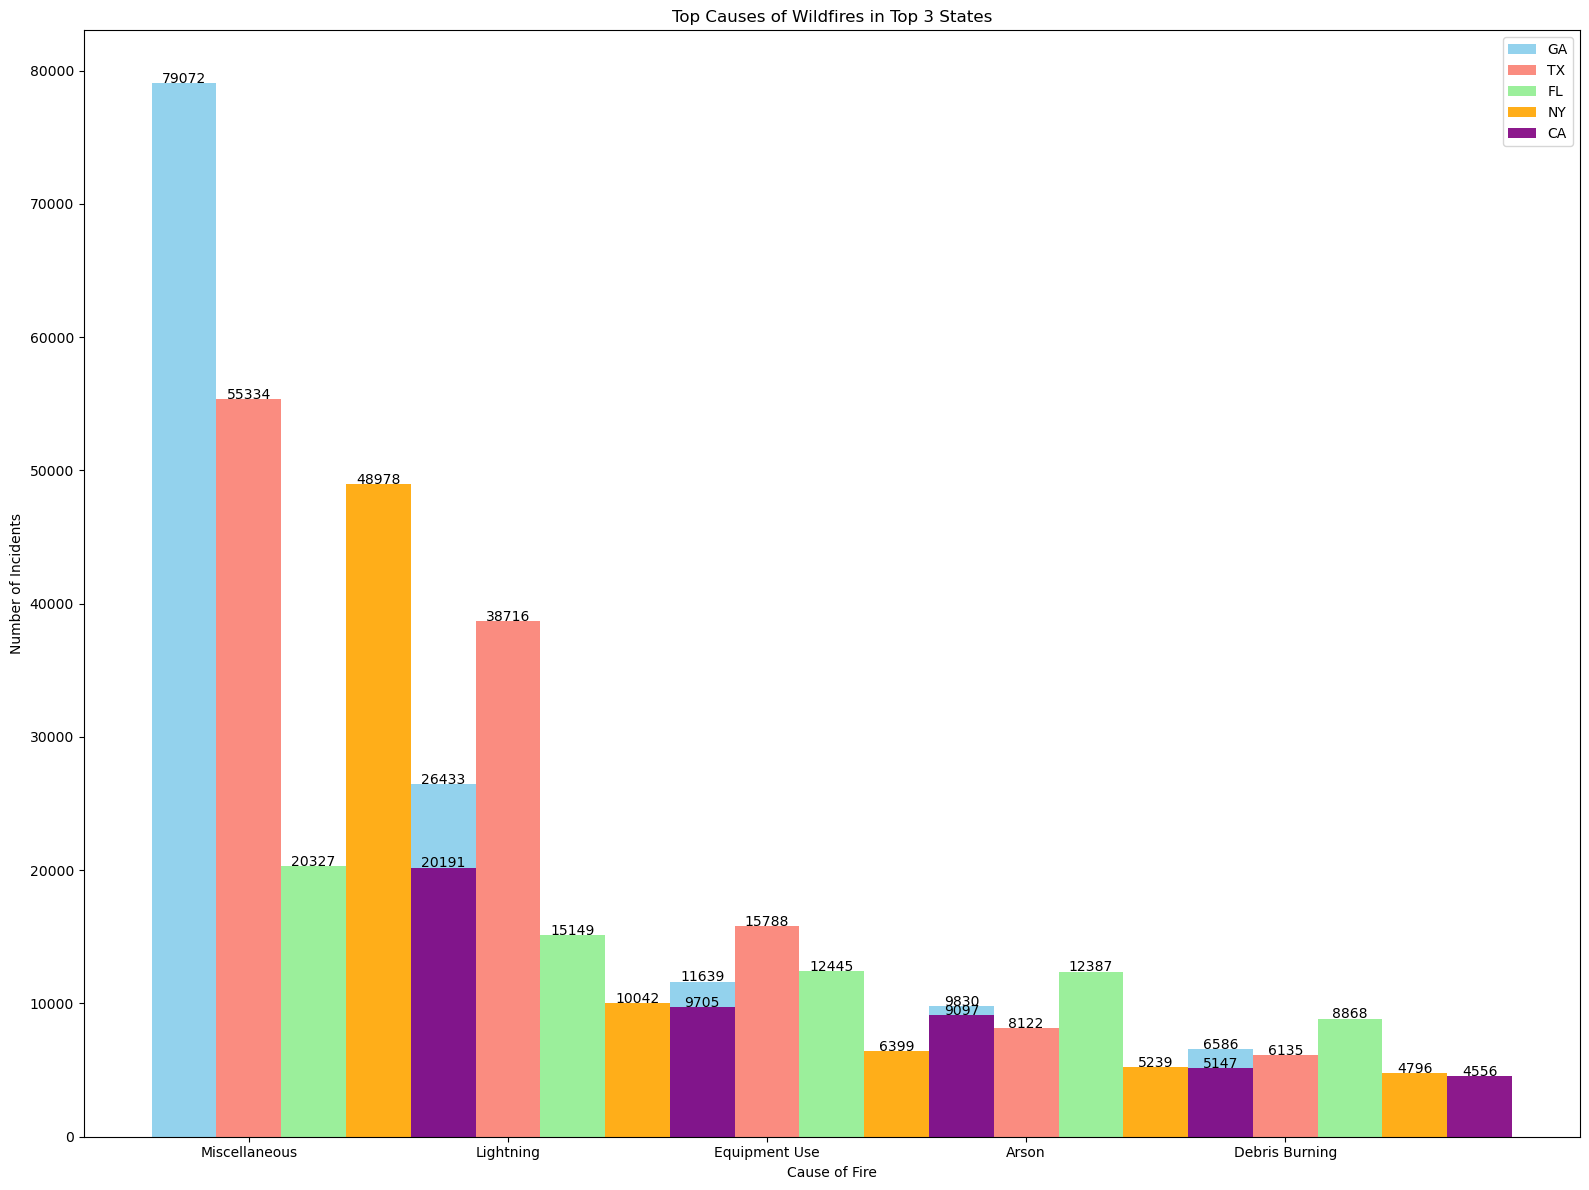

In [100]:
import numpy as np

# Set up the figure and axis
plt.figure(figsize=(16, 12))
ax = plt.gca()

# Definng colors for each state
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'purple']

for i, state in enumerate(top_states):
    state_data = top_states_data[top_states_data['STATE'] == state]
    incidents_by_cause = state_data['STAT_CAUSE_DESCR'].value_counts().head(5)
    x_offset = i * 0.25  # Offset to place bars side by side
    ax.bar(np.arange(len(incidents_by_cause)) + x_offset, incidents_by_cause.values, width=0.25, color=colors[i], alpha=0.9, label=state)
    
    for j, count in enumerate(incidents_by_cause.values):
        ax.text(j + x_offset, count + 15, str(count), ha='center', color='black')

plt.title('Top Causes of Wildfires in Top 3 States')
plt.xlabel('Cause of Fire')
plt.ylabel('Number of Incidents')
plt.xticks(np.arange(len(incidents_by_cause)) + 0.25, incidents_by_cause.index)
plt.legend()
plt.tight_layout()
plt.show()


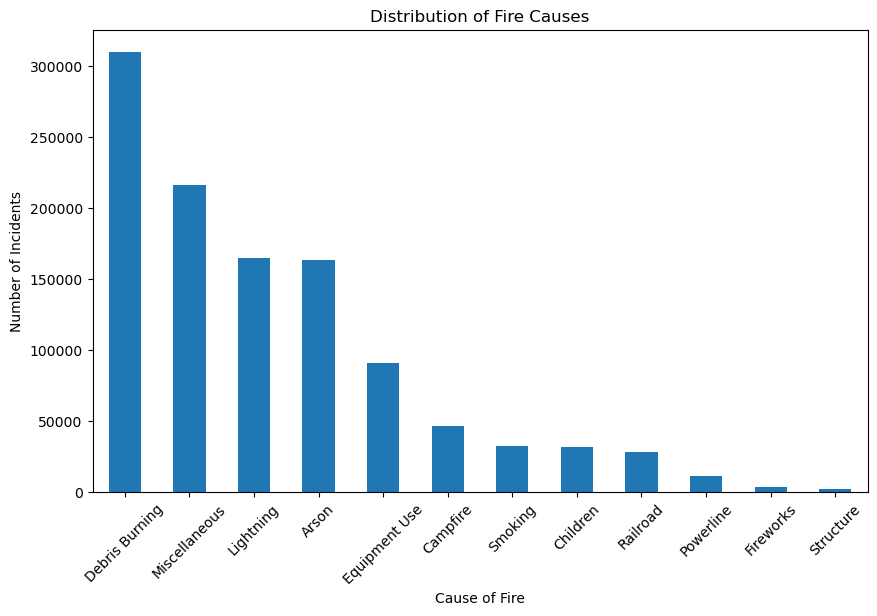

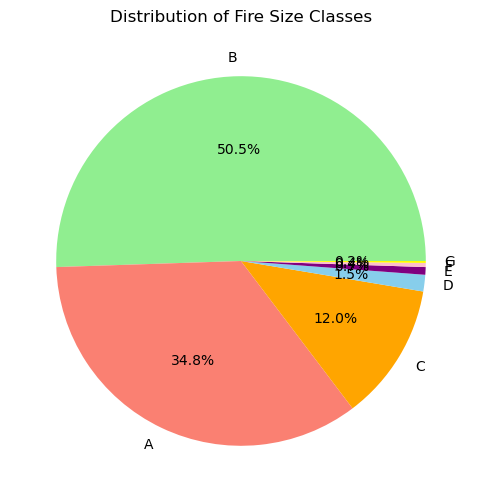

In [102]:

plt.figure(figsize=(10, 6))
fires_data['STAT_CAUSE_DESCR'].value_counts().plot(kind='bar')
plt.title('Distribution of Fire Causes')
plt.xlabel('Cause of Fire')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(8, 6))
fires_data['FIRE_SIZE_CLASS'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'salmon', 'orange', 'skyblue', 'purple', 'pink', 'yellow'])
plt.title('Distribution of Fire Size Classes')
plt.ylabel('')
plt.show()


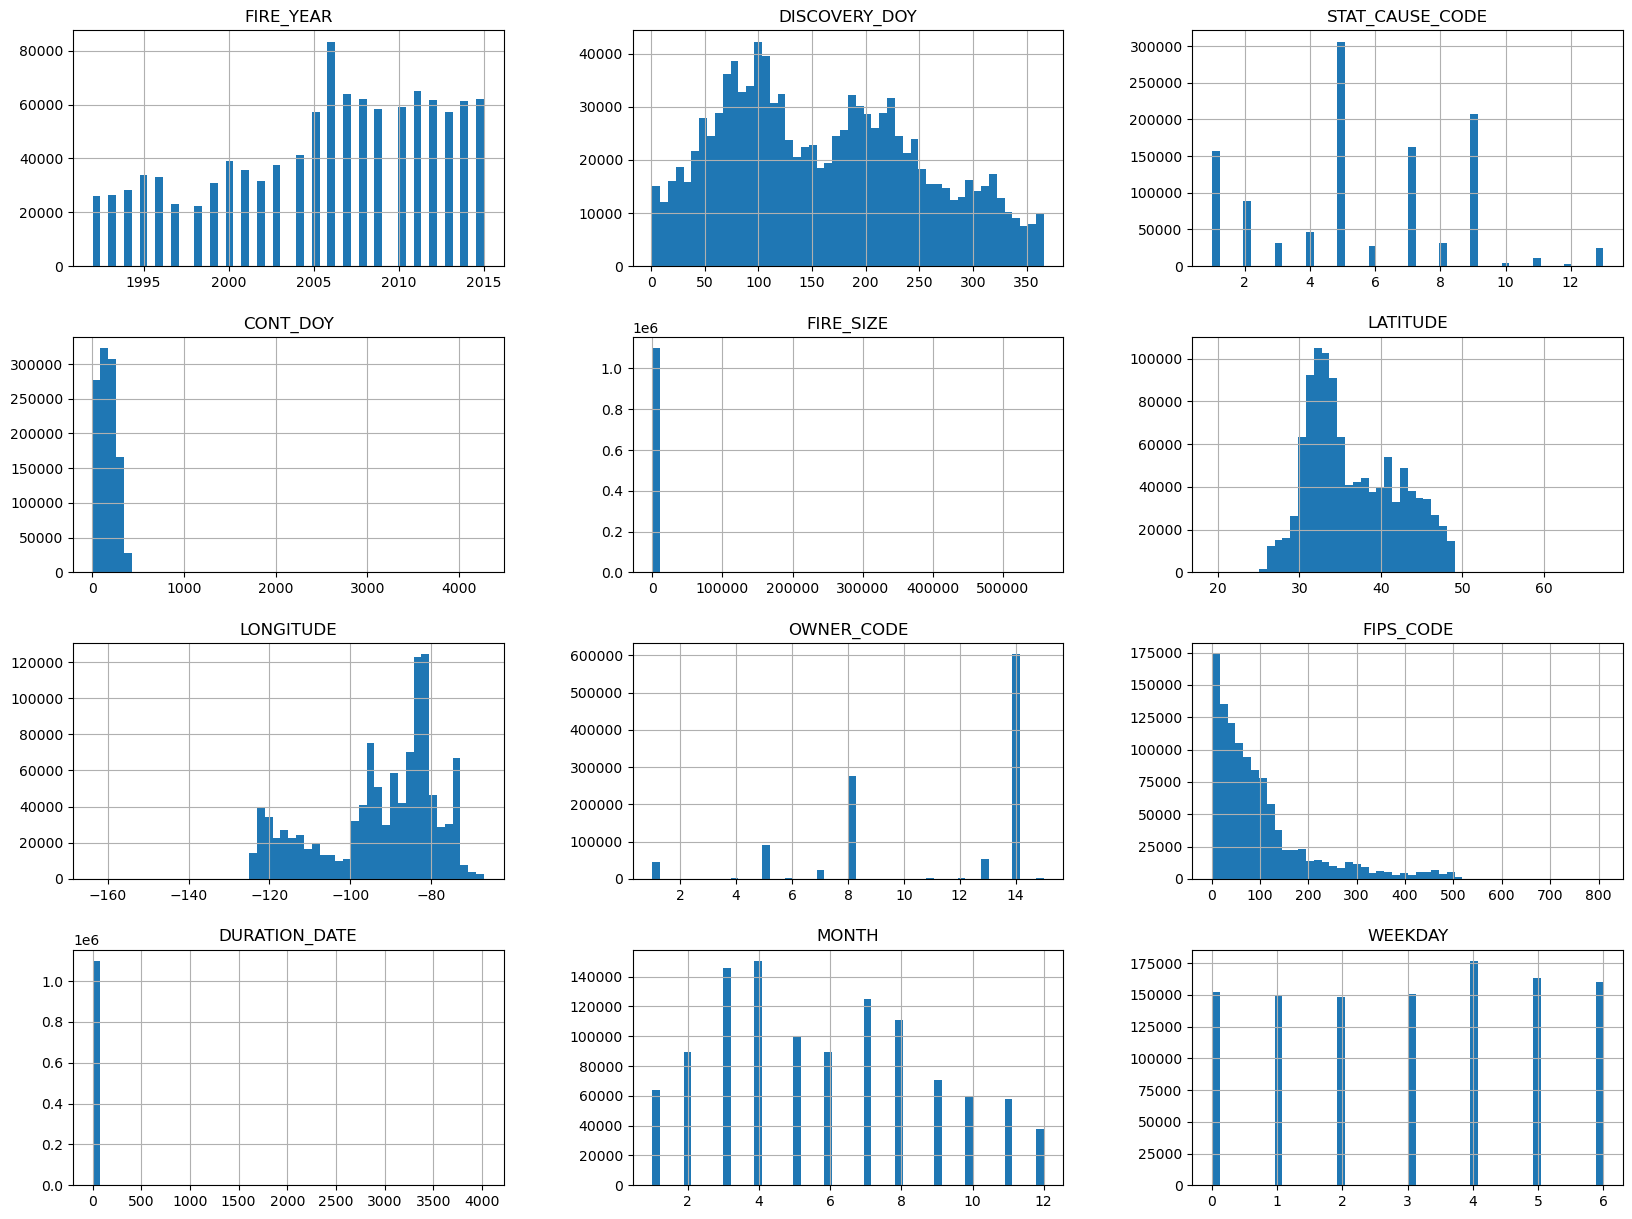

In [103]:
fires_data.hist(bins=50, figsize=(20,15))
plt.show()

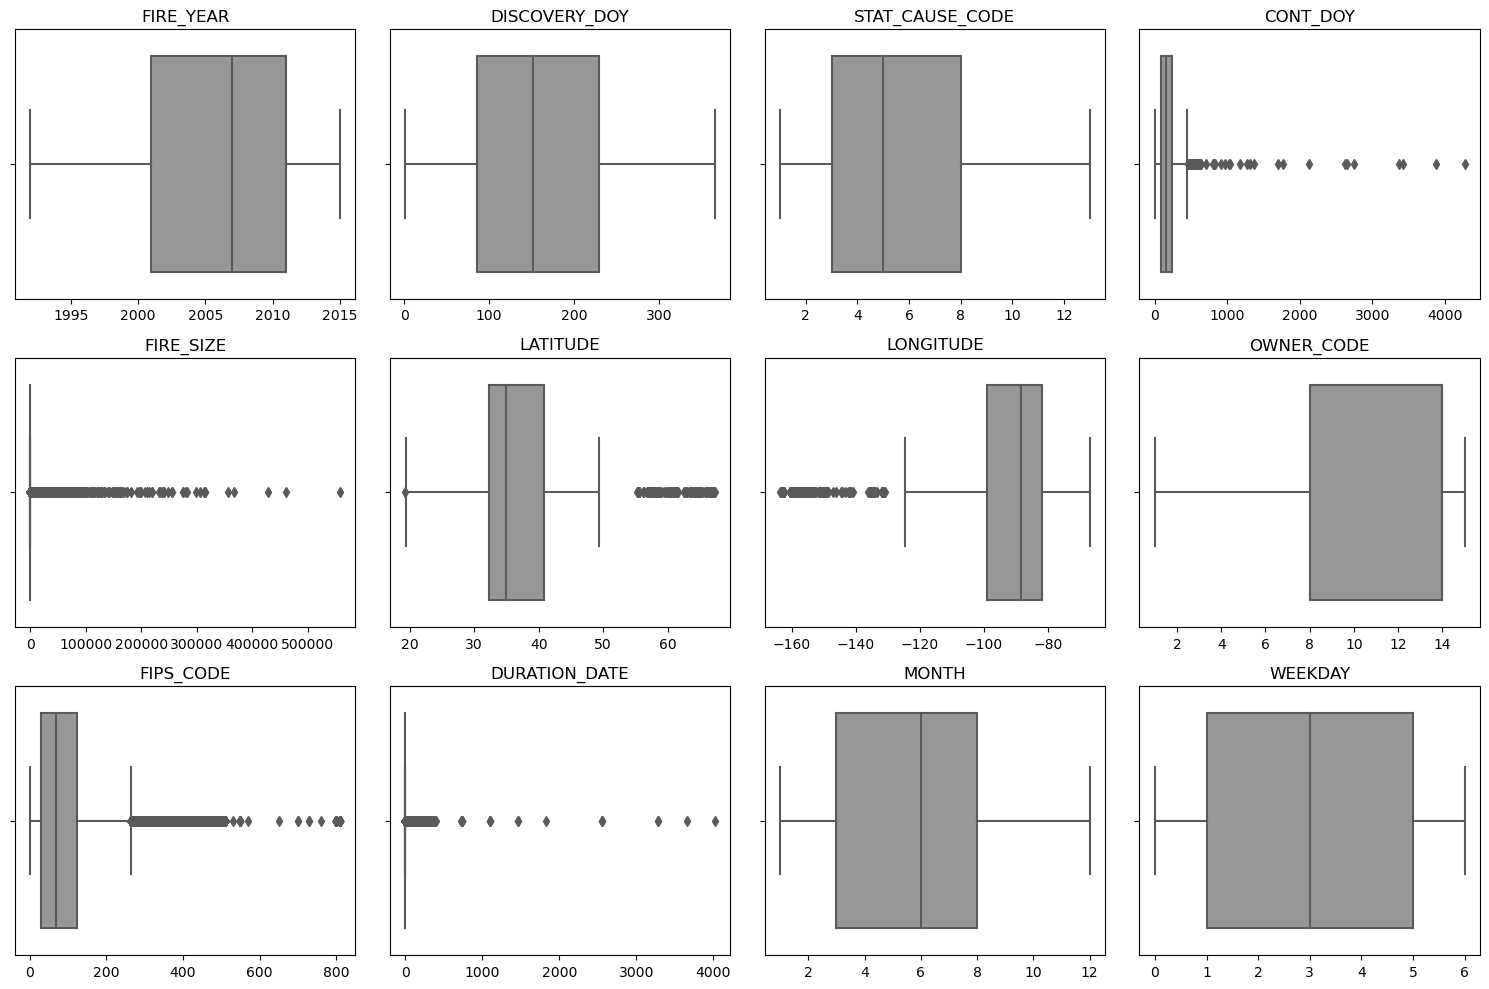

In [104]:
import numpy as np
numerical_cols = fires_data.select_dtypes(include=np.number).columns

num_rows = 3
num_cols = 4

total_subplots = num_rows * num_cols

blank_plots = total_subplots - len(numerical_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=fires_data[col], ax=axes[i], palette='Greys_r')
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

for j in range(len(numerical_cols), total_subplots):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


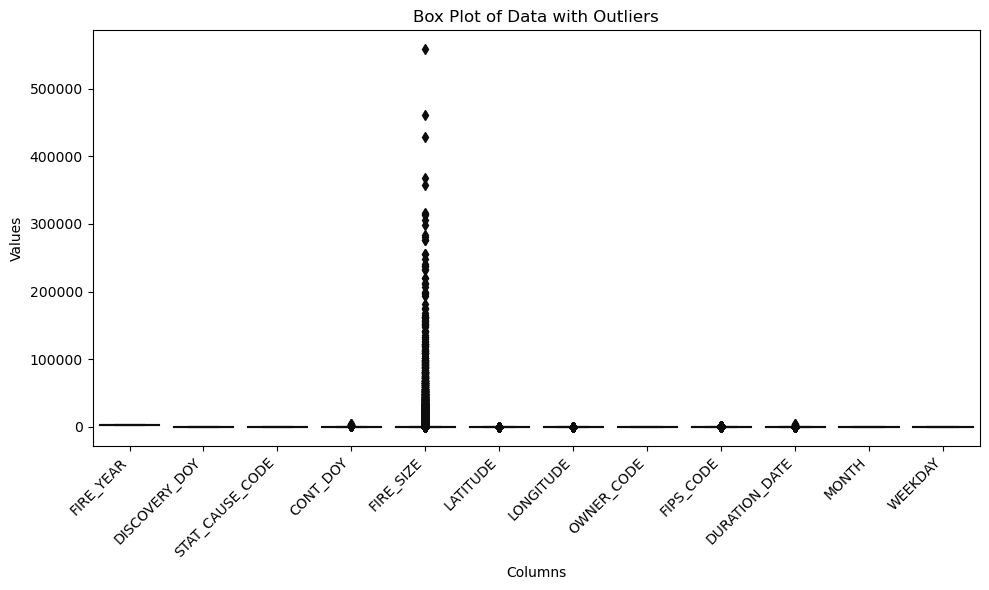

In [105]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=fires_data, palette='Greys_r')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Box Plot of Data with Outliers')

plt.tight_layout()
plt.show()

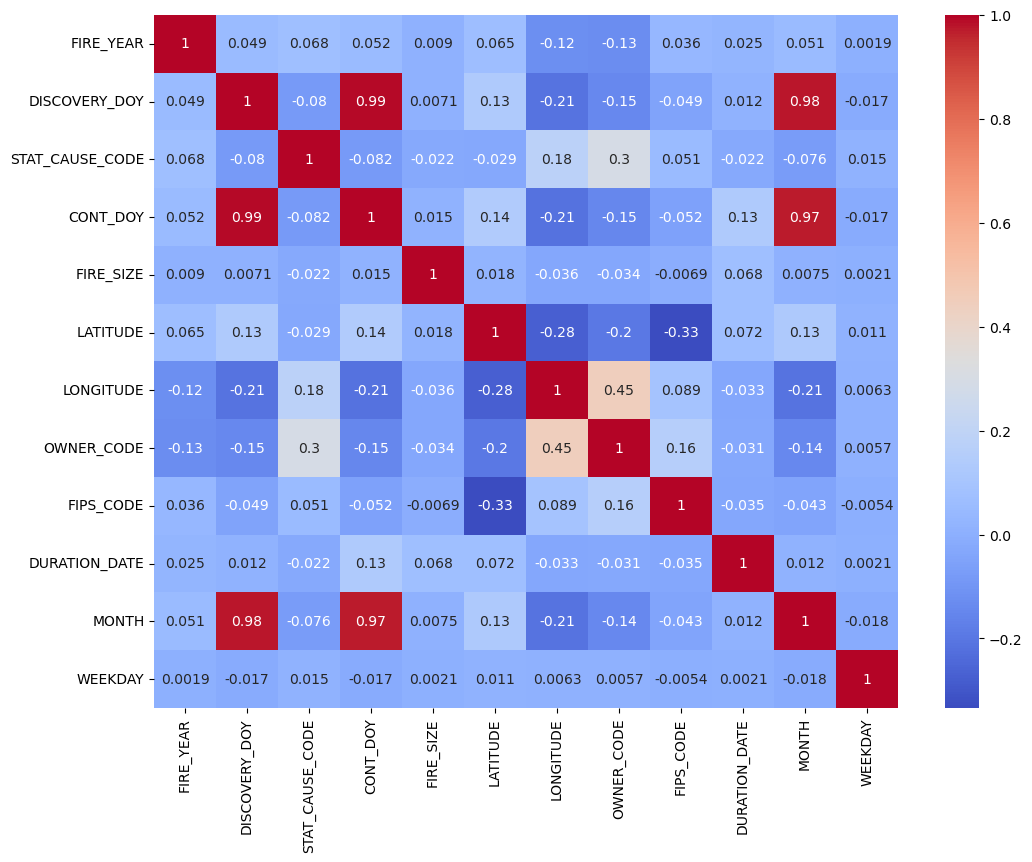

In [106]:
correlation_matrix = fires_data.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

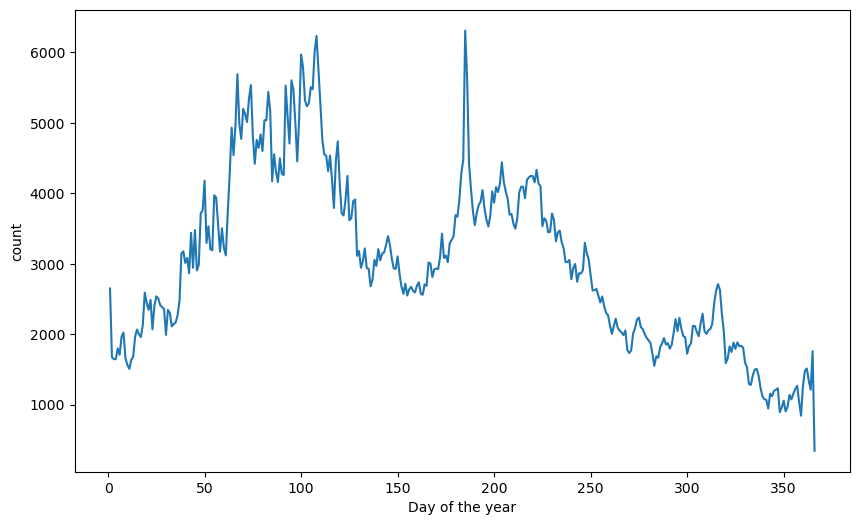

In [136]:
plt.figure(figsize=(10,6))
discovery_doy_counts = fires_data['DISCOVERY_DOY'].value_counts().reset_index()
discovery_doy_counts.columns = ['DISCOVERY_DOY', 'count']

# Now, plot the line plot with Seaborn
sns.lineplot(data=discovery_doy_counts, x='DISCOVERY_DOY', y='count')
plt.xlabel(xlabel='Day of the year')
plt.show()

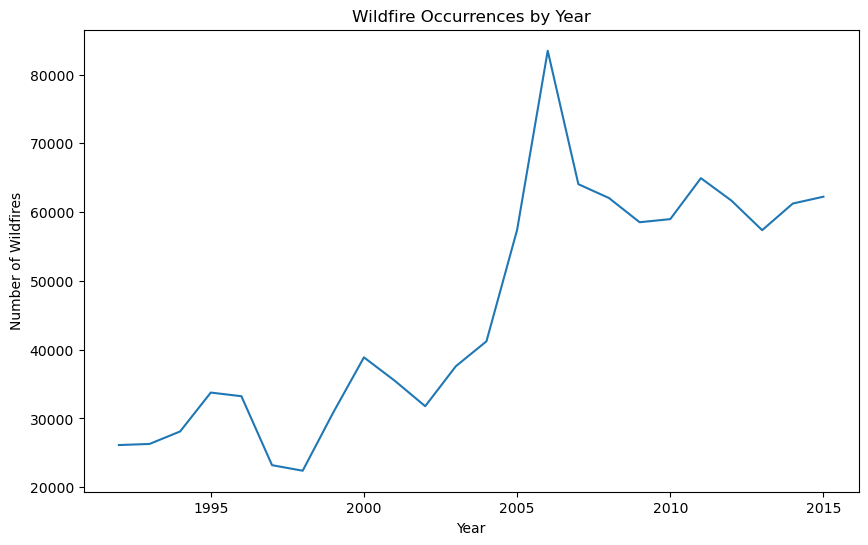

In [108]:
yearly_counts = fires_data.groupby(fires_data['FIRE_YEAR']).size()

# Plotting
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='line')
plt.title('Wildfire Occurrences by Year')
plt.xlabel('Year')
plt.ylabel('Number of Wildfires')
plt.show()

In [109]:
!pip install geopandas

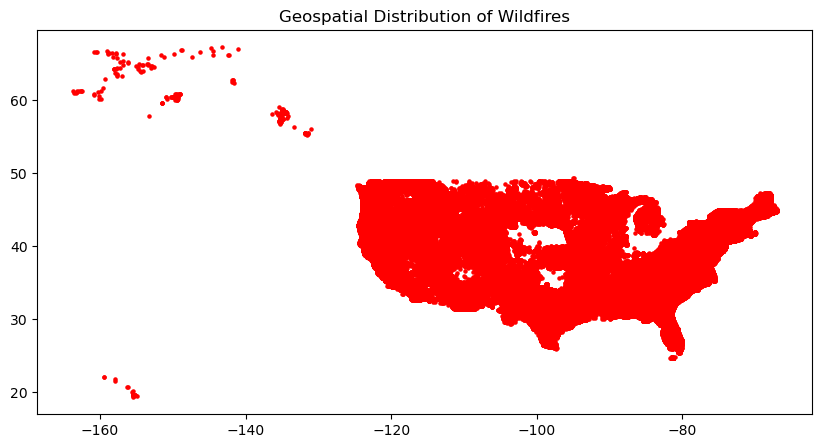

In [110]:
import geopandas as gpd
from shapely.geometry import Point

gdf = gpd.GeoDataFrame(fires_data, geometry=gpd.points_from_xy(fires_data.LONGITUDE, fires_data.LATITUDE))

gdf.plot(marker='o', color='red', markersize=5, figsize=(10, 6))
plt.title('Geospatial Distribution of Wildfires')
plt.show()

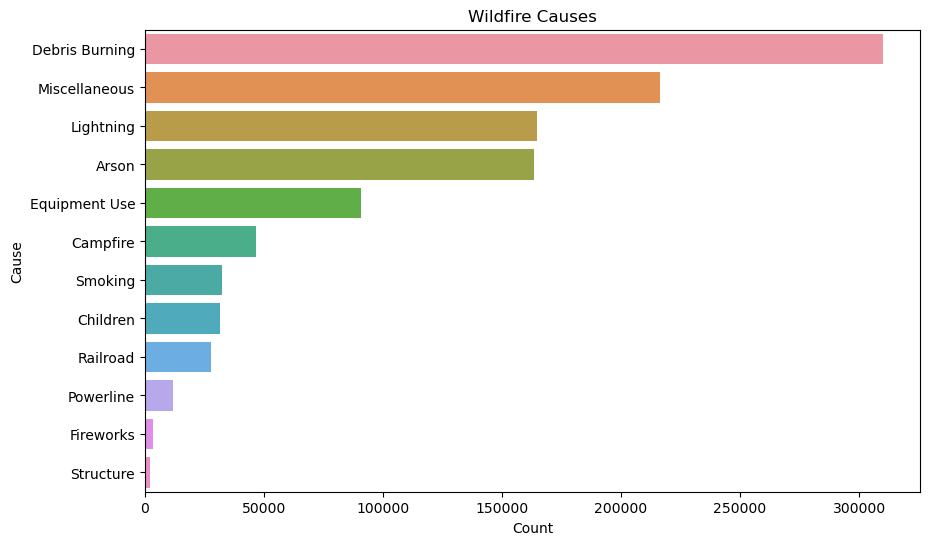

In [111]:
plt.figure(figsize=(10, 6))
sns.countplot(y='STAT_CAUSE_DESCR', data=fires_data, order = fires_data['STAT_CAUSE_DESCR'].value_counts().index)
plt.title('Wildfire Causes')
plt.xlabel('Count')
plt.ylabel('Cause')
plt.show()

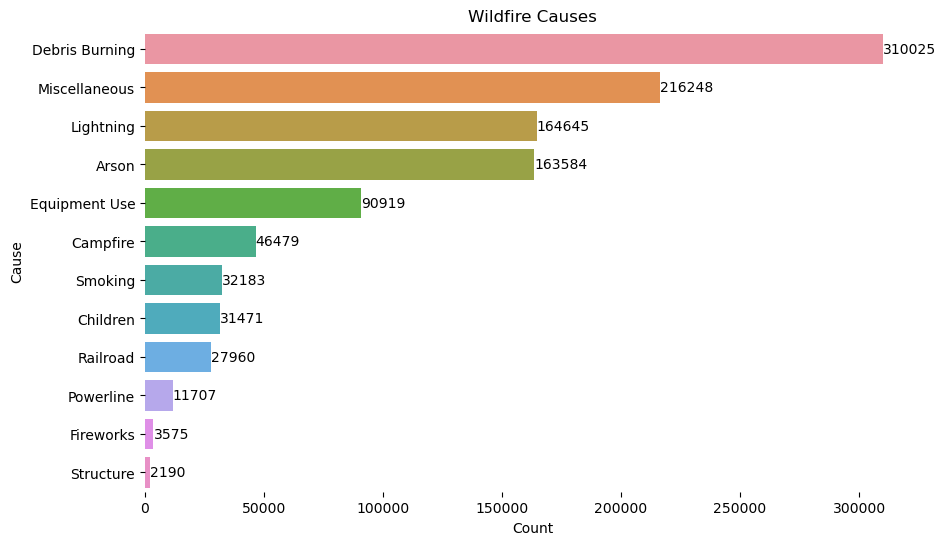

In [112]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='STAT_CAUSE_DESCR', data=fires_data, order=fires_data['STAT_CAUSE_DESCR'].value_counts().index)
plt.title('Wildfire Causes')
plt.xlabel('Count')
plt.ylabel('Cause')

sns.despine(left=True, bottom=True, right=True, top=True)

for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width() + 10, p.get_y() + p.get_height() / 2), ha='left', va='center')

ax.tick_params(axis='x', labelleft=False)

plt.show()

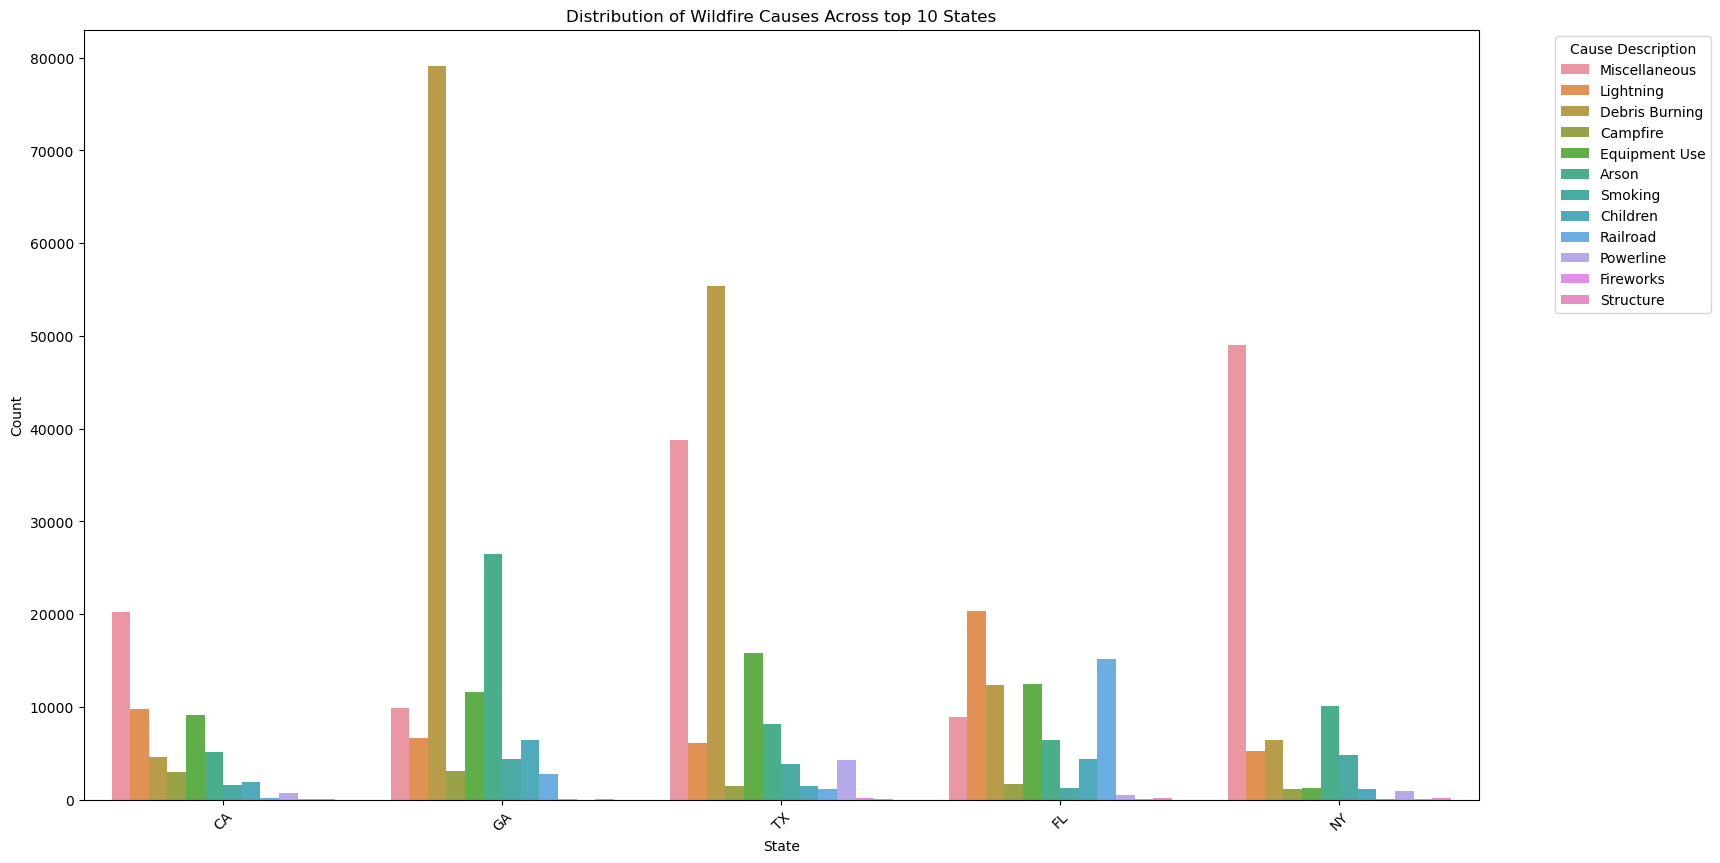

In [116]:
plt.figure(figsize=(18, 10))
sns.countplot(x='STATE', hue='STAT_CAUSE_DESCR', data=fires_data[fires_data['STATE'].isin(fires_data['STATE'].value_counts()[:5].index.to_list())])
plt.title('Distribution of Wildfire Causes Across top 10 States')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cause Description', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

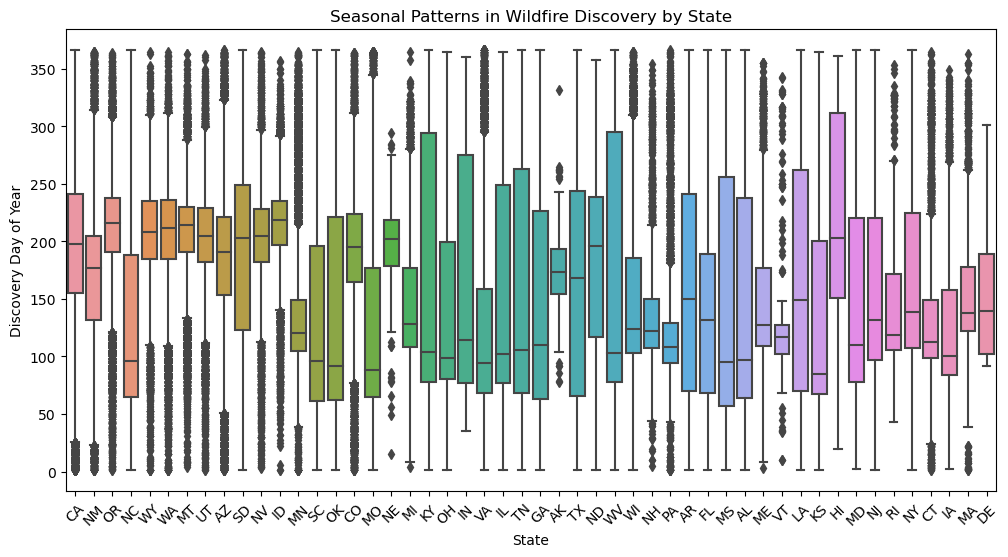

In [117]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='STATE', y='DISCOVERY_DOY', data=fires_data)
plt.title('Seasonal Patterns in Wildfire Discovery by State')
plt.xlabel('State')
plt.ylabel('Discovery Day of Year')
plt.xticks(rotation=45)
plt.show()

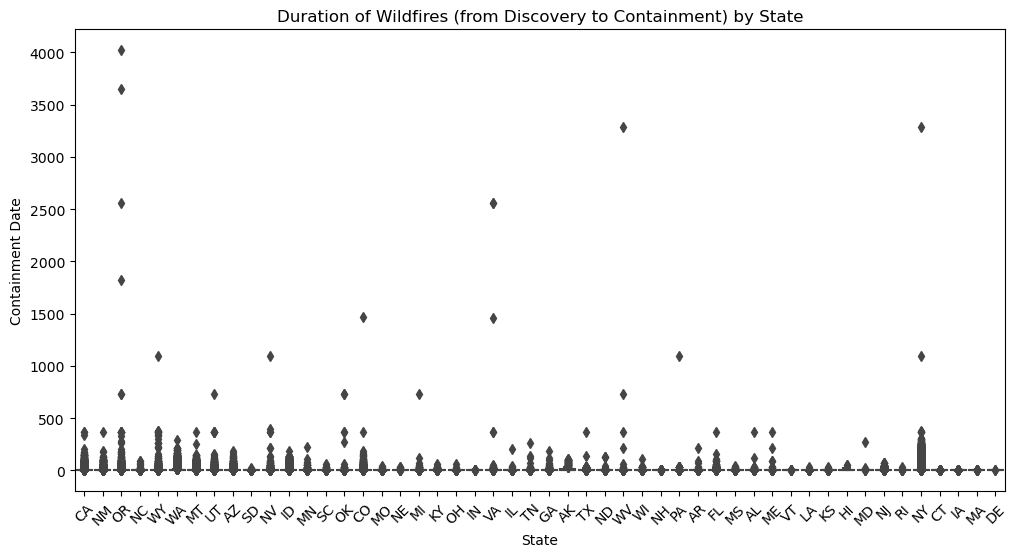

In [118]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='STATE', y='DURATION_DATE', data=fires_data)
plt.title('Duration of Wildfires (from Discovery to Containment) by State')
plt.xlabel('State')
plt.ylabel('Containment Date')
plt.xticks(rotation=45)
plt.show()


In [119]:
top_causes = fires_data[fires_data['STATE'].isin(top_states)]['STAT_CAUSE_DESCR'].value_counts().nlargest(3).index.tolist()
print(top_causes)
top_states_df = fires_data[fires_data['STATE'].isin(top_states)]
top_causes_df = top_states_df[top_states_df['STAT_CAUSE_DESCR'].isin(top_causes)]
top_causes_df['STATE'].head()

['Debris Burning', 'Miscellaneous', 'Arson']


0     CA
2     CA
10    CA
16    CA
86    CA
Name: STATE, dtype: object

In [120]:
cause_state_counts = fires_data.groupby(['STAT_CAUSE_DESCR', 'STATE']).size().reset_index(name='count')

cause_state_counts['rank'] = cause_state_counts.groupby('STAT_CAUSE_DESCR')['count'].rank(method='first', ascending=False)

top_causes_df = cause_state_counts[cause_state_counts['rank'] <= 3]

top_causes_df = top_causes_df.drop(columns='rank')

print(top_causes_df)

    STAT_CAUSE_DESCR STATE  count
9              Arson    GA  26433
23             Arson    MS  20990
32             Arson    NY  10042
50          Campfire    AL   3682
58          Campfire    GA   3050
85          Campfire    OR   4779
107         Children    FL   4321
108         Children    GA   6432
126         Children    NJ   4188
147   Debris Burning    AL  14266
155   Debris Burning    GA  79072
188   Debris Burning    TX  55334
204    Equipment Use    FL  12445
205    Equipment Use    GA  11639
238    Equipment Use    TX  15788
263        Fireworks    NC    212
281        Fireworks    WI    457
282        Fireworks    WV    911
292        Lightning    FL  20327
320        Lightning    OR  18659
326        Lightning    UT  13103
337    Miscellaneous    CA  20191
366    Miscellaneous    NY  48978
375    Miscellaneous    TX  38716
419        Powerline    TX   4307
424        Powerline    WI    940
425        Powerline    WV    938
434         Railroad    FL  15149
435         Ra

In [121]:
cause_state_counts = fires_data.groupby(['STAT_CAUSE_DESCR', 'STATE']).size().reset_index(name='count')

max_indices = cause_state_counts.groupby('STAT_CAUSE_DESCR')['count'].idxmax()

top_causes_df = cause_state_counts.loc[max_indices]

print(top_causes_df)

    STAT_CAUSE_DESCR STATE  count
9              Arson    GA  26433
85          Campfire    OR   4779
108         Children    GA   6432
155   Debris Burning    GA  79072
238    Equipment Use    TX  15788
282        Fireworks    WV    911
292        Lightning    FL  20327
366    Miscellaneous    NY  48978
419        Powerline    TX   4307
434         Railroad    FL  15149
506          Smoking    NY   4796
562        Structure    WV    342


In [123]:
'''
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='STATE', hue='STAT_CAUSE_DESCR', data=top_causes_df)
plt.title('Distribution of Top 3 Causes Across Top 5 States')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cause Description', bbox_to_anchor=(1.05, 1), loc='upper left')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()
'''

"\nplt.figure(figsize=(12, 6))\nax = sns.countplot(x='STATE', hue='STAT_CAUSE_DESCR', data=top_causes_df)\nplt.title('Distribution of Top 3 Causes Across Top 5 States')\nplt.xlabel('State')\nplt.ylabel('Count')\nplt.xticks(rotation=45)\nplt.legend(title='Cause Description', bbox_to_anchor=(1.05, 1), loc='upper left')\n\nfor p in ax.patches:\n    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')\n\nplt.show()\n"

# <center>MODELS</center>

In [ ]:
import pandas as pd
fires_data = pd.read_csv('fires_data.csv')

In [ ]:
fires_data.head()

In [ ]:
fires_data.shape

In [ ]:
from sklearn.preprocessing import LabelEncoder

## <center> LINEAR MODEL ON DURATION PREDICTION</center>

In [165]:
X = fires_data[['SOURCE_SYSTEM_TYPE','FIRE_NAME','FIRE_YEAR','DISCOVERY_DOY','MONTH','WEEKDAY','STAT_CAUSE_CODE','OWNER_DESCR','STATE','COUNTY_NAME']]

In [166]:
X['DURATION_DATE'] = fires_data['DURATION_DATE']

CONSIDERING ONLY DATA WHICH TOOK MORE THAN 3 DAYS 

In [167]:
X = X[X['DURATION_DATE']>3]

In [168]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

In [169]:
y=X['DURATION_DATE']
X = X.drop('DURATION_DATE',axis=1)

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state=79)

numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
numerical_transformer = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols)
    ])

from sklearn.linear_model import LinearRegression
model = LinearRegression()

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

In [175]:
from sklearn.metrics import mean_squared_error
pipeline.fit(X_train, y_train)

# Predicting on the test set
y_pred = pipeline.predict(X_test)

# Calculating the mean squared error on the test set
test_mse = mean_squared_error(y_test, y_pred)
print(f'Test RMSE: {test_mse**(1/2)}')

Test RMSE: 51.9535190862713


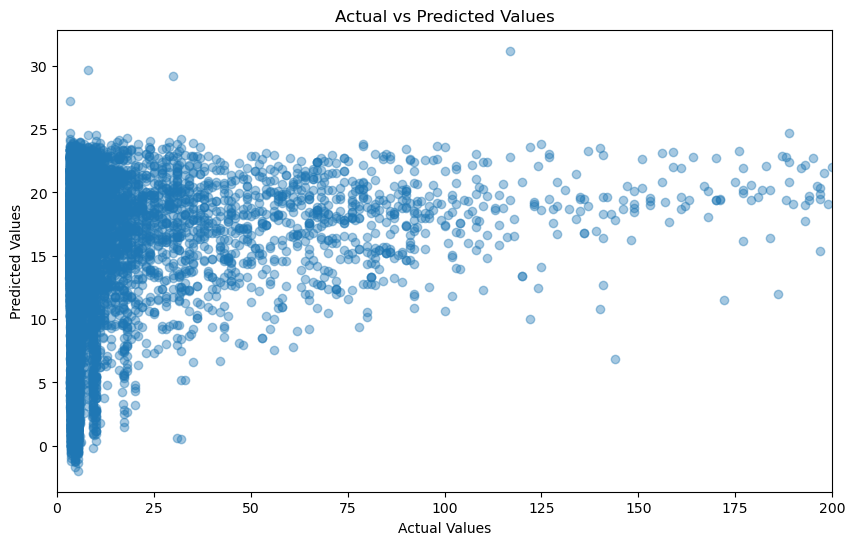

In [177]:
import matplotlib.pyplot as plt
# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.xlim(0,200)
plt.ylabel('Predicted Values')
plt.show()


## <center>RANDOM FOREST CLASSIFIER ON FIRE SIZE PREDICTION</center>

In [196]:
X = fires_data[['SOURCE_SYSTEM_TYPE','FIRE_NAME','FIRE_YEAR','DISCOVERY_DOY','MONTH','WEEKDAY','STAT_CAUSE_CODE','OWNER_DESCR','STATE','COUNTY_NAME']]

X['FIRE_SIZE'] = fires_data['FIRE_SIZE']

X = X[(X['FIRE_SIZE'] > 100)]


categorical_cols = X.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])



y=X['FIRE_SIZE']
X = X.drop('FIRE_SIZE',axis=1)

In [197]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=90)

numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
numerical_transformer = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols)
    ])

In [198]:
from sklearn.linear_model import LinearRegression
model = RandomForestRegressor(n_estimators=10)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])


pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['FIRE_YEAR', 'DISCOVERY_DOY', 'MONTH', 'WEEKDAY', 'STAT_CAUSE_CODE'], dtype='object'))])),
                ('model', RandomForestRegressor(n_estimators=10))])

In [199]:
# Predicting on the test set
y_pred = pipeline.predict(X_test)

# Calculating the mean squared error on the test set
test_mse = mean_squared_error(y_test, y_pred)
print(f'Test RMSE: {test_mse**(1/2)}')

Test RMSE: 10941.227120715515


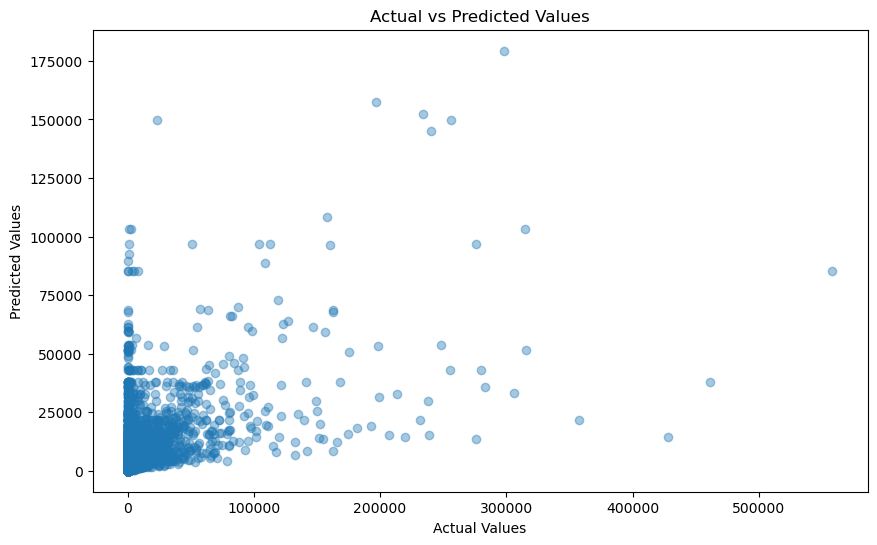

In [200]:
import matplotlib.pyplot as plt
import numpy as np
# Assuming 'y_test' contains the actual values and 'y_pred' contains the predicted values from your model
# Replace 'y_test' and 'y_pred' with your actual data variables

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, pipeline.predict(X_train), alpha=0.4)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


## <center>RANDOM FOREST CLASSIFIER ON PROBABLE CAUSE OF THE WILD FIRE</center>

In [261]:
X = fires_data[['SOURCE_SYSTEM_TYPE','FIRE_NAME','FIRE_YEAR','DISCOVERY_DOY','MONTH','WEEKDAY','STAT_CAUSE_DESCR','STAT_CAUSE_CODE','OWNER_DESCR','STATE','COUNTY_NAME','FIRE_SIZE']]
#X =  X[(X['FIRE_SIZE'] > 100) & (X['FIRE_SIZE']<50000)]
y=   X['STAT_CAUSE_DESCR']
X = X.drop('STAT_CAUSE_DESCR',axis=1)

In [262]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=79)

numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
numerical_transformer = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols)
    ])


In [263]:
model = RandomForestClassifier(n_estimators=5)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])


pipeline.fit(X_train, y_train)

# Predicting on the test set
y_pred = pipeline.predict(X_test)

In [264]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pipeline.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     64929
           1       0.99      1.00      1.00     18658
           2       1.00      1.00      1.00     12540
           3       0.99      0.99      0.99    124268
           4       0.99      0.98      0.99     36603
           5       0.98      0.97      0.98      1461
           6       0.98      0.98      0.98     66038
           7       0.98      0.99      0.98     86524
           8       0.99      0.98      0.99      4647
           9       1.00      1.00      1.00     11122
          10       0.99      0.99      0.99     12720
          11       0.99      0.97      0.98       885

    accuracy                           0.99    440395
   macro avg       0.99      0.99      0.99    440395
weighted avg       0.99      0.99      0.99    440395

